## Mahine learning Project 1 - KNN MNIST data

In [1]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [2]:
import time
start_time = time.time()

In [3]:
df_train = pd.read_csv('train.csv')
# df_train = df_train.iloc[:]
len(df_train)

42000

In [4]:
X_mnist = df_train.drop('label', axis = 1)
y_mnist = df_train['label']
X_mnist.head()
# y_train.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
scaler = MinMaxScaler()
X_mnist_scaled = scaler.fit_transform(X_mnist)
X_mnist_scaled

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [6]:
# X_mnist_image = np.array(X_mnist.iloc[:,:])
# X_mnist_image = X_mnist_image.reshape(X_mnist.shape[0],28,28)
# X_mnist_image[0]

In [7]:
X_predict = pd.read_csv('test.csv')
X_predict_scaled = scaler.fit_transform(X_predict)
X_predict_scaled

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X_mnist_scaled, y_mnist)

In [9]:
# %%time
# accuracy = list()
# test_error = list()
# train_error = list()
# n = 30
# for k in range(1, n, 2):
#     knn = KNeighborsClassifier(n_neighbors = k)
#     knn.fit(X_train, y_train)
#     y_predict = knn.predict(X_test)
#     accuracy.append(accuracy_score(y_test, y_predict))
#     train_error.append(1 - knn.score(X_train, y_train))
#     test_error.append(1 - accuracy_score(y_test, y_predict))


In [10]:
# accuracy

In [11]:
# # plt.plot(np.arange(1, n), np.asarray(train_error), '-o')
# # plt.plot(np.arange(1, n), np.asarray(test_error), '-x')
# plt.plot(np.arange(1, n, 2), np.asarray(test_error), '-o')
# plt.xticks(np.arange(1, n, 2.0))
# plt.xlabel('Value of K')
# plt.ylabel('Test error rate')

In [12]:
# bestk = 2 * np.asarray(accuracy).argmax() + 1
import math
k = int(math.sqrt(len(X_mnist_scaled)))
k

204

In [13]:
%%time
knn = KNeighborsClassifier(n_neighbors = k)
knn.fit(X_mnist_scaled, y_mnist)
y_predict = knn.predict(X_mnist_scaled)


Wall time: 27min 35s


In [14]:
confusion_matrix(y_mnist, y_predict)

array([[4047,    4,    2,    1,    2,   19,   44,    3,    5,    5],
       [   0, 4659,    7,    4,    2,    0,    3,    5,    1,    3],
       [  70,  284, 3523,   36,   25,   10,   26,  143,   38,   22],
       [  15,  101,   26, 3973,    4,   56,   19,   57,   48,   52],
       [   3,  126,    0,    0, 3646,    2,   29,   12,    2,  252],
       [  27,   91,    0,   95,   16, 3401,   73,    7,    9,   76],
       [  51,   52,    0,    0,   12,   25, 3993,    3,    1,    0],
       [   5,  197,    9,    0,   15,    1,    1, 4068,    0,  105],
       [  28,  208,    7,  163,   30,  101,   32,   24, 3335,  135],
       [  25,   56,    4,   55,   37,    4,    3,  115,    7, 3882]],
      dtype=int64)

In [15]:
%%time
y_test_predict = knn.predict(X_predict_scaled)


Wall time: 1h 35min


In [16]:
end_time = time.time()
clock_time = end_time - start_time
clock_time

7360.399115085602

In [21]:
y_test_predict

array([2, 0, 9, ..., 3, 9, 2], dtype=int64)

In [50]:
df = pd.DataFrame(y_test_predict, columns = ['label']).reset_index()
df['index'] = df['index'] + 1
df = df.rename(columns = {'index': 'ImageId'})
df.head()

,ImageId,label
0,1,2
1,2,0
2,3,9
3,4,7
4,5,3


In [44]:
df.to_csv('predict.csv', index = False)

In [45]:
df_train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


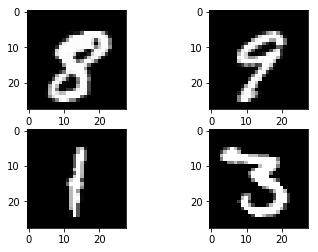

In [82]:
imglist = list()
for i in range(10, 14):
    imgarray = np.array(X_mnist.iloc[i])
    imgarray.resize(28,28)
    imglist.append(imgarray)
plt.gray()
plt.subplot(221)
plt.imshow(imglist[0])
plt.subplot(222)
plt.imshow(imglist[1])
plt.subplot(223)
plt.imshow(imglist[2])
plt.subplot(224)
plt.imshow(imglist[3])

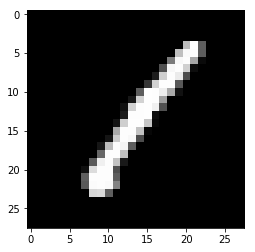